<a href="https://colab.research.google.com/github/ai7dnn/2021-2-DNN/blob/main/code/21_12_cnn_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3)
(1, 3, 3, 1)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]


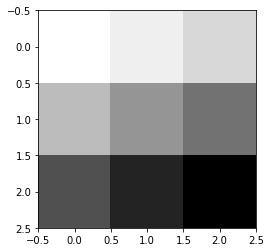

In [ ]:
image = np.array([[[1,2,3],
                   [4,5,6], 
                   [7,8,9]]], dtype=np.float32)
print(image.shape)
image = image.reshape(-1, 3, 3, 1)
'''
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
'''
print(image.shape)
print(image)
plt.imshow(image.reshape(3,3), cmap='Greys')

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
image.reshape(3,3)

(1, 3, 3, 1)


array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)

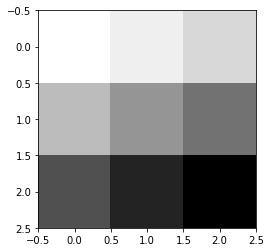

In [ ]:
plt.imshow(image.reshape(3,3), cmap='Greys');

## 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

In [ ]:
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print("image.shape", image.shape)

# wight가 커널
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)


In [ ]:
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
print(type(conv2d_img))
print(conv2d_img)

conv2d.shape (1, 2, 2, 1)
<class 'numpy.ndarray'>
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]


[[12. 16.]
 [24. 28.]]


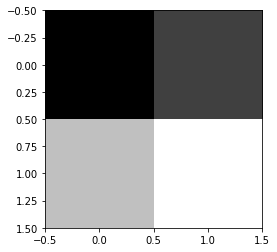

In [ ]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 1, i+1)
    plt.imshow(one_img.reshape(2,2), cmap='gray')

conv2d.shape (1, 4, 4, 2)
결과 자체 tf.Tensor(
[[[[10.         1.9      ]
   [10.         2.2      ]
   [ 6.         1.6      ]
   [ 6.         2.       ]]

  [[12.         1.4      ]
   [15.         2.2      ]
   [13.         2.7      ]
   [13.         1.7      ]]

  [[ 7.         1.7      ]
   [11.         1.3000001]
   [16.         1.3      ]
   [ 7.         1.       ]]

  [[10.         0.6      ]
   [ 7.         1.4000001]
   [ 4.         1.5      ]
   [ 7.         1.4      ]]]], shape=(1, 4, 4, 2), dtype=float32)
[[10. 10.  6.  6.]
 [12. 15. 13. 13.]
 [ 7. 11. 16.  7.]
 [10.  7.  4.  7.]]
[[1.9       2.2       1.6       2.       ]
 [1.4       2.2       2.7       1.7      ]
 [1.7       1.3000001 1.3       1.       ]
 [0.6       1.4000001 1.5       1.4      ]]


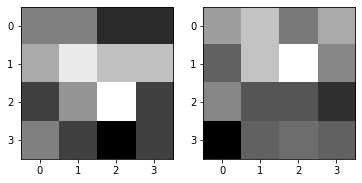

In [ ]:
x_in = np.array([[
  [[2], [1], [2], [0], [1]],
  [[1], [3], [2], [2], [3]],
  [[1], [1], [3], [3], [0]],
  [[2], [2], [0], [1], [1]],
  [[0], [0], [3], [1], [2]], ]])
x = tf.constant(x_in, dtype=tf.float32)

# 2 x 2 커널 2개 적용
kernel_in = np.array([
 [ [[2, 0.1]],[[3, 0.2]] ],
 [ [[0, 0.3]],[[1, 0.4]] ], ])
kernel = tf.constant(kernel_in, dtype=tf.float32)

conv2d = tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d.shape", conv2d.shape)
print("결과 자체", conv2d)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(4,4))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(4,4), cmap='gray')

In [ ]:
x_in = np.array([[
  [[2], [1], [2], [0], [1]],
  [[1], [3], [2], [2], [3]],
  [[1], [1], [3], [3], [0]],
  [[2], [2], [0], [1], [1]],
  [[0], [0], [3], [1], [2]], ]])
x = tf.constant(x_in, dtype=tf.float32)

# 2 x 2 커널 3개 적용
kernel_in = np.array([
 [ [[2, 0.1, 1]],[[3, 0.2, 1]] ],
 [ [[0, 0.3, 1]],[[1, 0.4, 1]] ], ])
kernel = tf.constant(kernel_in, dtype=tf.float32)

conv2d = tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='VALID')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(4,4))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(4,4), cmap='gray')

NameError: ignored

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


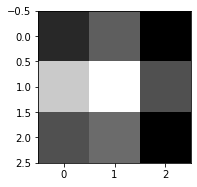

In [ ]:
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


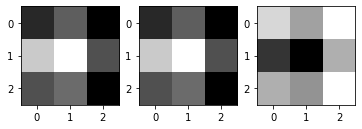

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
print("conv2d.shape", conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [ ]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

mnist = mnist.load_data()

In [ ]:
len(mnist[0])

2

In [ ]:
len(mnist[0][0][0])

28

In [ ]:
mnist[0][0][0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

(28, 28)


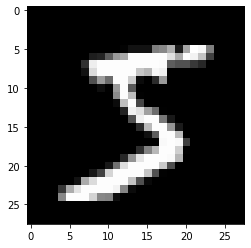

In [ ]:
# mnist[0][0][0]: 학습 데이터, 이미지 중, 첫번째  
img = mnist[0][0][0].reshape(28,28)
plt.imshow(img, cmap='gray')
print(img.shape)

(1, 14, 14, 5)


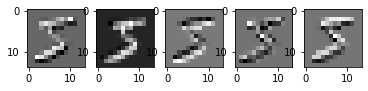

In [ ]:
# 4차원으로 확장
img = img.reshape(-1,28,28,1)
# 3 x 3의 필터 5개 생성
W1 = tf.Variable(tf.random.normal([3, 3, 1, 5], stddev=0.01))

#conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
conv2d = tf.nn.conv2d(img, W1, strides=2, padding='SAME')
print(conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(14,14), cmap='gray')


(1, 7, 7, 5)


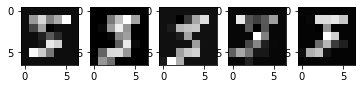

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], 
                      strides=[1, 2, 2, 1], padding='SAME')
print(pool.shape)

pool_img = np.swapaxes(pool, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(7, 7), cmap='gray')

(1, 14, 14, 8)
(8, 14, 14, 1)


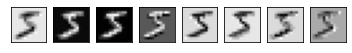

In [ ]:
# 4차원으로 확장
img = img.reshape(-1,28,28,1)

# 3 x 3의 필터 n개 생성
f_num = 8
W1 = tf.Variable(tf.random.normal([3, 3, 1, f_num], stddev=0.01))

#conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
conv2d = tf.nn.conv2d(img, W1, strides=2, padding='SAME')
print(conv2d.shape)

conv2d_img = np.swapaxes(conv2d, 0, 3)
print(conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, f_num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(one_img.reshape(14,14), cmap='gray')

두 개의 층으로 구성

(28, 28)
(1, 14, 14, 8)
(8, 14, 14, 1)


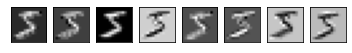

In [ ]:
# mnist[0][0][0]: 학습 데이터, 이미지 중, 첫번째  
img = mnist[0][0][0].reshape(28,28)
plt.imshow(img, cmap='gray')
print(img.shape)

# 4차원으로 확장
img = img.reshape(-1,28,28,1)

# 3 x 3의 필터 n개 생성
f_num = 8
W1 = tf.Variable(tf.random.normal([3, 3, 1, f_num], stddev=0.01))

print(conv2d.shape)
conv2d = tf.nn.conv2d(img, W1, strides=2, padding='SAME')

conv2d_img = np.swapaxes(conv2d, 0, 3)
print(conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, f_num, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(one_img.reshape(14,14), cmap='gray')

(10, 7, 7, 1)


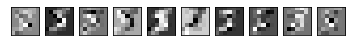

In [ ]:
# 3 x 3의 필터 n개 생성
f_num2 = 10
W1 = tf.Variable(tf.random.normal([3, 3, f_num, f_num2], stddev=0.01))

conv2d = tf.nn.conv2d(conv2d, W1, strides=2, padding='SAME')

conv2d_img = np.swapaxes(conv2d, 0, 3)
print(conv2d_img.shape)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, f_num2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(one_img.reshape(7,7), cmap='gray')

In [ ]:
input_shape = (1, 3, 3, 1)
x = np.arange(1.0, 10.0, 1.0).reshape(1, 3, 3, 1)
x

array([[[[1.],
         [2.],
         [3.]],

        [[4.],
         [5.],
         [6.]],

        [[7.],
         [8.],
         [9.]]]])

In [ ]:
y = tf.keras.layers.Conv2D(filters=1, kernel_size=2, activation='relu', input_shape=input_shape[1:])(x)
y

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[1.299397 ],
         [1.8090171]],

        [[2.828257 ],
         [3.337877 ]]]], dtype=float32)>

tf.keras.layers.Conv2D API Reference

In [ ]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(filters=2, kernel_size=3, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)

(4, 26, 26, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
x

<tf.Tensor: shape=(4, 28, 28, 3), dtype=float32, numpy=
array([[[[ 5.93498386e-02,  5.94954252e-01,  1.74183130e-01],
         [-4.88284618e-01, -5.16649008e-01,  2.82303244e-01],
         [ 1.58276111e-01,  4.45488632e-01, -8.05471063e-01],
         ...,
         [-1.24069667e+00,  7.04941809e-01,  6.93511665e-01],
         [-1.00527894e+00,  7.80358374e-01,  1.60554051e+00],
         [-3.22131813e-01, -4.10663486e-01, -8.28685760e-01]],

        [[ 1.52489793e+00, -4.30189610e-01, -7.27357924e-01],
         [-5.53764343e-01, -1.14914763e+00,  1.20753956e+00],
         [-1.88493848e-01,  1.26188412e-01, -7.62882590e-01],
         ...,
         [ 6.20656647e-02,  7.72386014e-01,  1.62608457e+00],
         [ 2.43470833e-01,  4.18777078e-01,  2.11820662e-01],
         [-5.85823238e-01, -5.45331657e-01, -7.93574631e-01]],

        [[-1.53558105e-01,  8.43452588e-02,  6.40354812e-01],
         [ 5.97104132e-01,  1.22990096e+00, -3.79394859e-01],
         [-5.82711399e-01, -1.72076881e+00, 

In [ ]:
input_shape[]

(4, 28, 28, 3)

In [ ]:
input_shape[1:]

(28, 28, 3)

In [ ]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
input_shape = (1, 3, 3, 1)
x = np.arange(1.0, 10.0, 1.0).reshape(1, 3, 3, 1)
y = tf.keras.layers.Conv2D(1, 2, activation='relu', input_shape=input_shape[1:])(x)
y

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[1.315109  ],
         [0.9905386 ]],

        [[0.3413973 ],
         [0.01682615]]]], dtype=float32)>

tf.keras.layers.Conv2D

In [ ]:
y = tf.keras.layers.Conv2D?

In [ ]:
# The inputs are 28x28 RGB images with `channels_last` and the batch
# size is 4.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=input_shape[1:])(x)
print(y.shape)

(4, 26, 26, 10)


In [ ]:
input_shape[1:]

(28, 28, 3)

In [ ]:
# With `dilation_rate` as 2.
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(2, 3, activation='relu', dilation_rate=2, input_shape=input_shape[1:])(x)
print(y.shape)

(4, 24, 24, 2)


In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(
2, 3, activation='relu', padding="same", input_shape=input_shape[1:])(x)
print(y.shape)


(4, 28, 28, 2)


In [ ]:
# With extended batch shape [4, 7]:
input_shape = (4, 7, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(
2, 3, activation='relu', input_shape=input_shape[2:])(x)
print(y.shape)


(4, 7, 26, 26, 2)
